In [461]:
from src.utils.results_utils import *
from src.utils.data_utils import str_dict_to_values

# Ethnicity model

In [462]:
df_ethnicity = pd.read_csv('data/name_ethnicity.csv')
df_ethnicity.sample(10)

,Name,Baltic,East Asian,English-Speaking,Germanic,Hispanic,Middle Eastern,Nordic,North Africa,Oceania,Romance,Slavic,South Asian,Southeast Asian,Sub-Saharan Africa
3347,Seiko,0.0,1.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
3183,Roberto,0.0,0.0,0.04,0.00,0.44,0.0,0.0,0.0,0.0,0.52,0.0,0.0,0.0,0.0
1797,Janina,0.0,0.0,0.00,1.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
4074,Yves,0.0,0.0,0.00,0.25,0.00,0.0,0.0,0.0,0.0,0.75,0.0,0.0,0.0,0.0
2867,Ok,0.0,1.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
3169,Rikard,0.0,0.0,0.00,0.00,0.00,0.0,1.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
1100,Eunice,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,1.0
3131,Reiner,0.0,0.0,0.00,1.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0
449,Bianco,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.00,0.0,0.0,0.0,0.0
2211,Lauritz,0.0,0.0,0.00,1.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0


In [463]:
region_counts = (df_ethnicity.iloc[:, 1:] != 0).sum()
region_counts.sort_values(ascending=False).head(14)

Germanic              818
English-Speaking      743
Slavic                742
Romance               663
East Asian            487
Hispanic              480
Nordic                418
Oceania               404
Sub-Saharan Africa    155
South Asian           144
Middle Eastern         96
Southeast Asian        59
Baltic                 57
North Africa           28
dtype: int64

## 1. N-Gram

In [464]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [465]:
# Correct ngram_range with two values: (2, 4)
vectorizer = CountVectorizer(analyzer='char', ngram_range=(2, 3))

# Fit and transform the 'Name' column
char_ngrams = vectorizer.fit_transform(df_ethnicity['Name'])

# Create a DataFrame with the n-gram features
ngram_df = pd.DataFrame(char_ngrams.toarray(), columns=vectorizer.get_feature_names_out())

# Convert to float32 to reduce memory usage
ngram_df = ngram_df.astype('float32')

# Output shape
print(ngram_df.shape)

(4115, 3967)


In [466]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [467]:
# Standardize the data
scaler = StandardScaler()
ngram_scaled = scaler.fit_transform(ngram_df)

# Initialize PCA and fit the scaled data
n=100
pca = PCA(n_components=n)  # Choose the number of components
ngram_pca = pca.fit_transform(ngram_scaled)

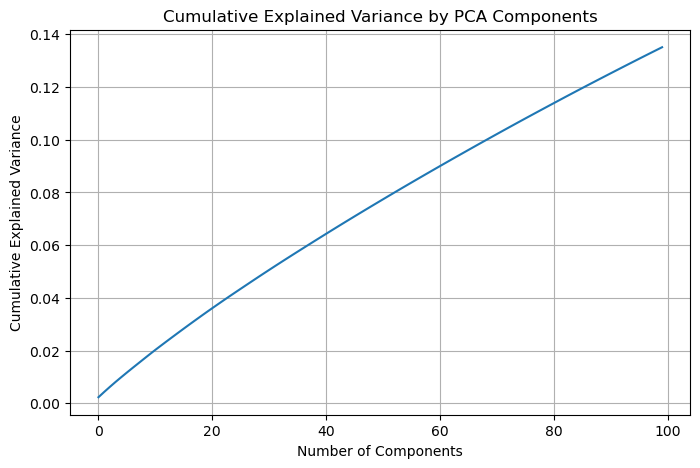

In [468]:
# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()


In [469]:
# Create a DataFrame for the PCA-transformed data
pca_columns = [f'PC{i+1}' for i in range(n)]  # Generate column names PC1 to PC1000
ngram_pca_df = pd.DataFrame(ngram_pca, columns=pca_columns, index=ngram_df.index)  # Ensure indices match

# Merge the original DataFrame with the PCA DataFrame on their indices
df_ethnicity_pca = pd.concat([df_ethnicity, ngram_pca_df], axis=1)

df_ethnicity_pca.head()

,Name,Baltic,East Asian,English-Speaking,Germanic,Hispanic,Middle Eastern,Nordic,North Africa,Oceania,...,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100
0,ALDAIR,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.361043,-0.014307,2.069725,-0.094862,-0.607468,-0.821363,-1.063010,-0.732654,1.394947,-0.095864
1,ALEX,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.606744,-0.676717,-1.173532,-0.807080,0.464592,0.029246,-0.049369,-1.508030,-0.593870,1.179834
2,ALEXANDRE,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,4.572405,0.246615,-3.137434,-2.061409,2.415082,-0.143787,-0.220997,-1.757854,-2.015320,2.181447
3,ALINE,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.127580,-0.599108,0.050400,0.016174,0.075911,0.763066,-1.042243,-0.788340,0.969760,-0.307905
4,AMARAL,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-0.487539,-0.322016,1.436159,0.423112,0.432723,-1.506941,-0.145236,-0.275090,-0.447889,0.202699


In [470]:
from sklearn.model_selection import train_test_split

# Define features and targets
X = df_ethnicity_pca.drop(columns='Name').iloc[:, 14:]
Y = df_ethnicity_pca.drop(columns='Name').iloc[:, :14]

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

print(f"There are {X_train.shape[0]} samples in the training set.")
print(f"There are {X_test.shape[0]} samples in the testing set.")

There are 2880 samples in the training set.
There are 1235 samples in the testing set.


In [471]:
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

columns = ["Constant"] + list(df_ethnicity_pca.drop(columns='Name').iloc[:, 14:].columns) 
df_X_train = pd.DataFrame(X_train, columns=columns)

In [472]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

df_X_train = df_X_train.reset_index(drop=True)
df_Y_train = pd.DataFrame(Y_train, columns=df_ethnicity_pca.drop(columns='Name').iloc[:, :14].columns).reset_index(drop=True)


multi_output_model = MultiOutputRegressor(LinearRegression())
multi_output_model_results = multi_output_model.fit(X_train, Y_train)

# Predict
Y_pred = multi_output_model.predict(X_test)

# Evaluate (e.g., Mean Squared Error for each target)
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Errors for each target:", mse)

Mean Squared Errors for each target: [0.00920521 0.05930366 0.09614416 0.11226829 0.0839125  0.02680888
 0.05903888 0.00573243 0.04670301 0.08688072 0.14201188 0.03090464
 0.01590272 0.02181531]


In [473]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, Y_pred)
print(f"R2 Score : {r2}")

R2 Score : -0.010796216820436457


In [474]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor
rand_forest_model = RandomForestRegressor(random_state=42)  # Set random_state for reproducibility

# Fit the model to the training data
rand_forest_model_results = rand_forest_model.fit(X_train, Y_train)

# Predict on the test set
Y_pred = rand_forest_model_results.predict(X_test)

# Evaluate Mean Squared Error for each target
mse = mean_squared_error(Y_test, Y_pred, multioutput='raw_values')
print("Mean Squared Errors for each target:", mse)

# Calculate and display the R2 score
r2 = r2_score(Y_test, Y_pred)
print(f"R2 Score : {r2}")


Mean Squared Errors for each target: [0.00806101 0.03950411 0.09122262 0.10247537 0.07573682 0.02308744
 0.05337437 0.00566979 0.04570951 0.08107863 0.09534758 0.02905825
 0.01657546 0.01969378]
R2 Score : 0.09341919679612466


Best number of components: 11, Lowest average MSE: 0.05545932959554111


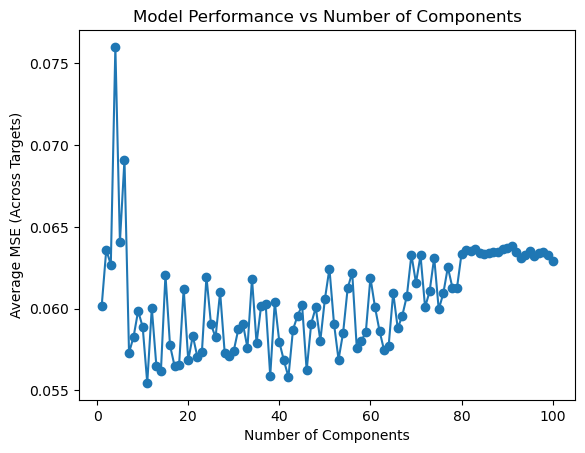

In [478]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# List to store results
results = []

# Iterate over the number of PCA components
for n in range(1, X.shape[1] + 1):
    # Apply PCA with n components
    pca = PCA(n_components=n)
    X_reduced = pca.fit_transform(X)

    # Evaluate each target column separately
    target_scores = []
    for col in Y.columns:
        model = LinearRegression()
        scores = cross_val_score(
            model, X_reduced, Y[col], cv=5, scoring='neg_mean_squared_error'
        )
        # Append mean of absolute MSE scores
        target_scores.append(-np.mean(scores))

    # Store average performance across all targets
    results.append((n, np.mean(target_scores)))

# Find the best n
best_n, best_score = min(results, key=lambda x: x[1])  # Minimize error
print(f"Best number of components: {best_n}, Lowest average MSE: {best_score}")

# Plot results
plt.plot([r[0] for r in results], [r[1] for r in results], marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Average MSE (Across Targets)')
plt.title('Model Performance vs Number of Components')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# List to store results
results = []

# Iterate over the number of PCA components
for n in range(1, X.shape[1] + 1):
    # Apply PCA with n components
    pca = PCA(n_components=n)
    X_reduced = pca.fit_transform(X)

    # Evaluate each target column separately
    target_scores = []
    for col in Y.columns:
        model = RandomForestRegressor()
        scores = cross_val_score(
            model, X_reduced, Y[col], cv=5, scoring='neg_mean_squared_error'
        )
        # Append mean of absolute MSE scores
        target_scores.append(-np.mean(scores))

    # Store average performance across all targets
    results.append((n, np.mean(target_scores)))

# Find the best n
best_n, best_score = min(results, key=lambda x: x[1])  # Minimize error
print(f"Best number of components: {best_n}, Lowest average MSE: {best_score}")

# Plot results
plt.plot([r[0] for r in results], [r[1] for r in results], marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Average MSE (Across Targets)')
plt.title('Model Performance vs Number of Components')
plt.show()